In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv('social_media_engagement_data.csv')

# We will create a graph based on 'Audience Location' and 'Campaign ID'
# Let's assume we are only interested in entries with non-null values for these columns
grouped = df.groupby('Audience Location')['Reach'].sum().reset_index()

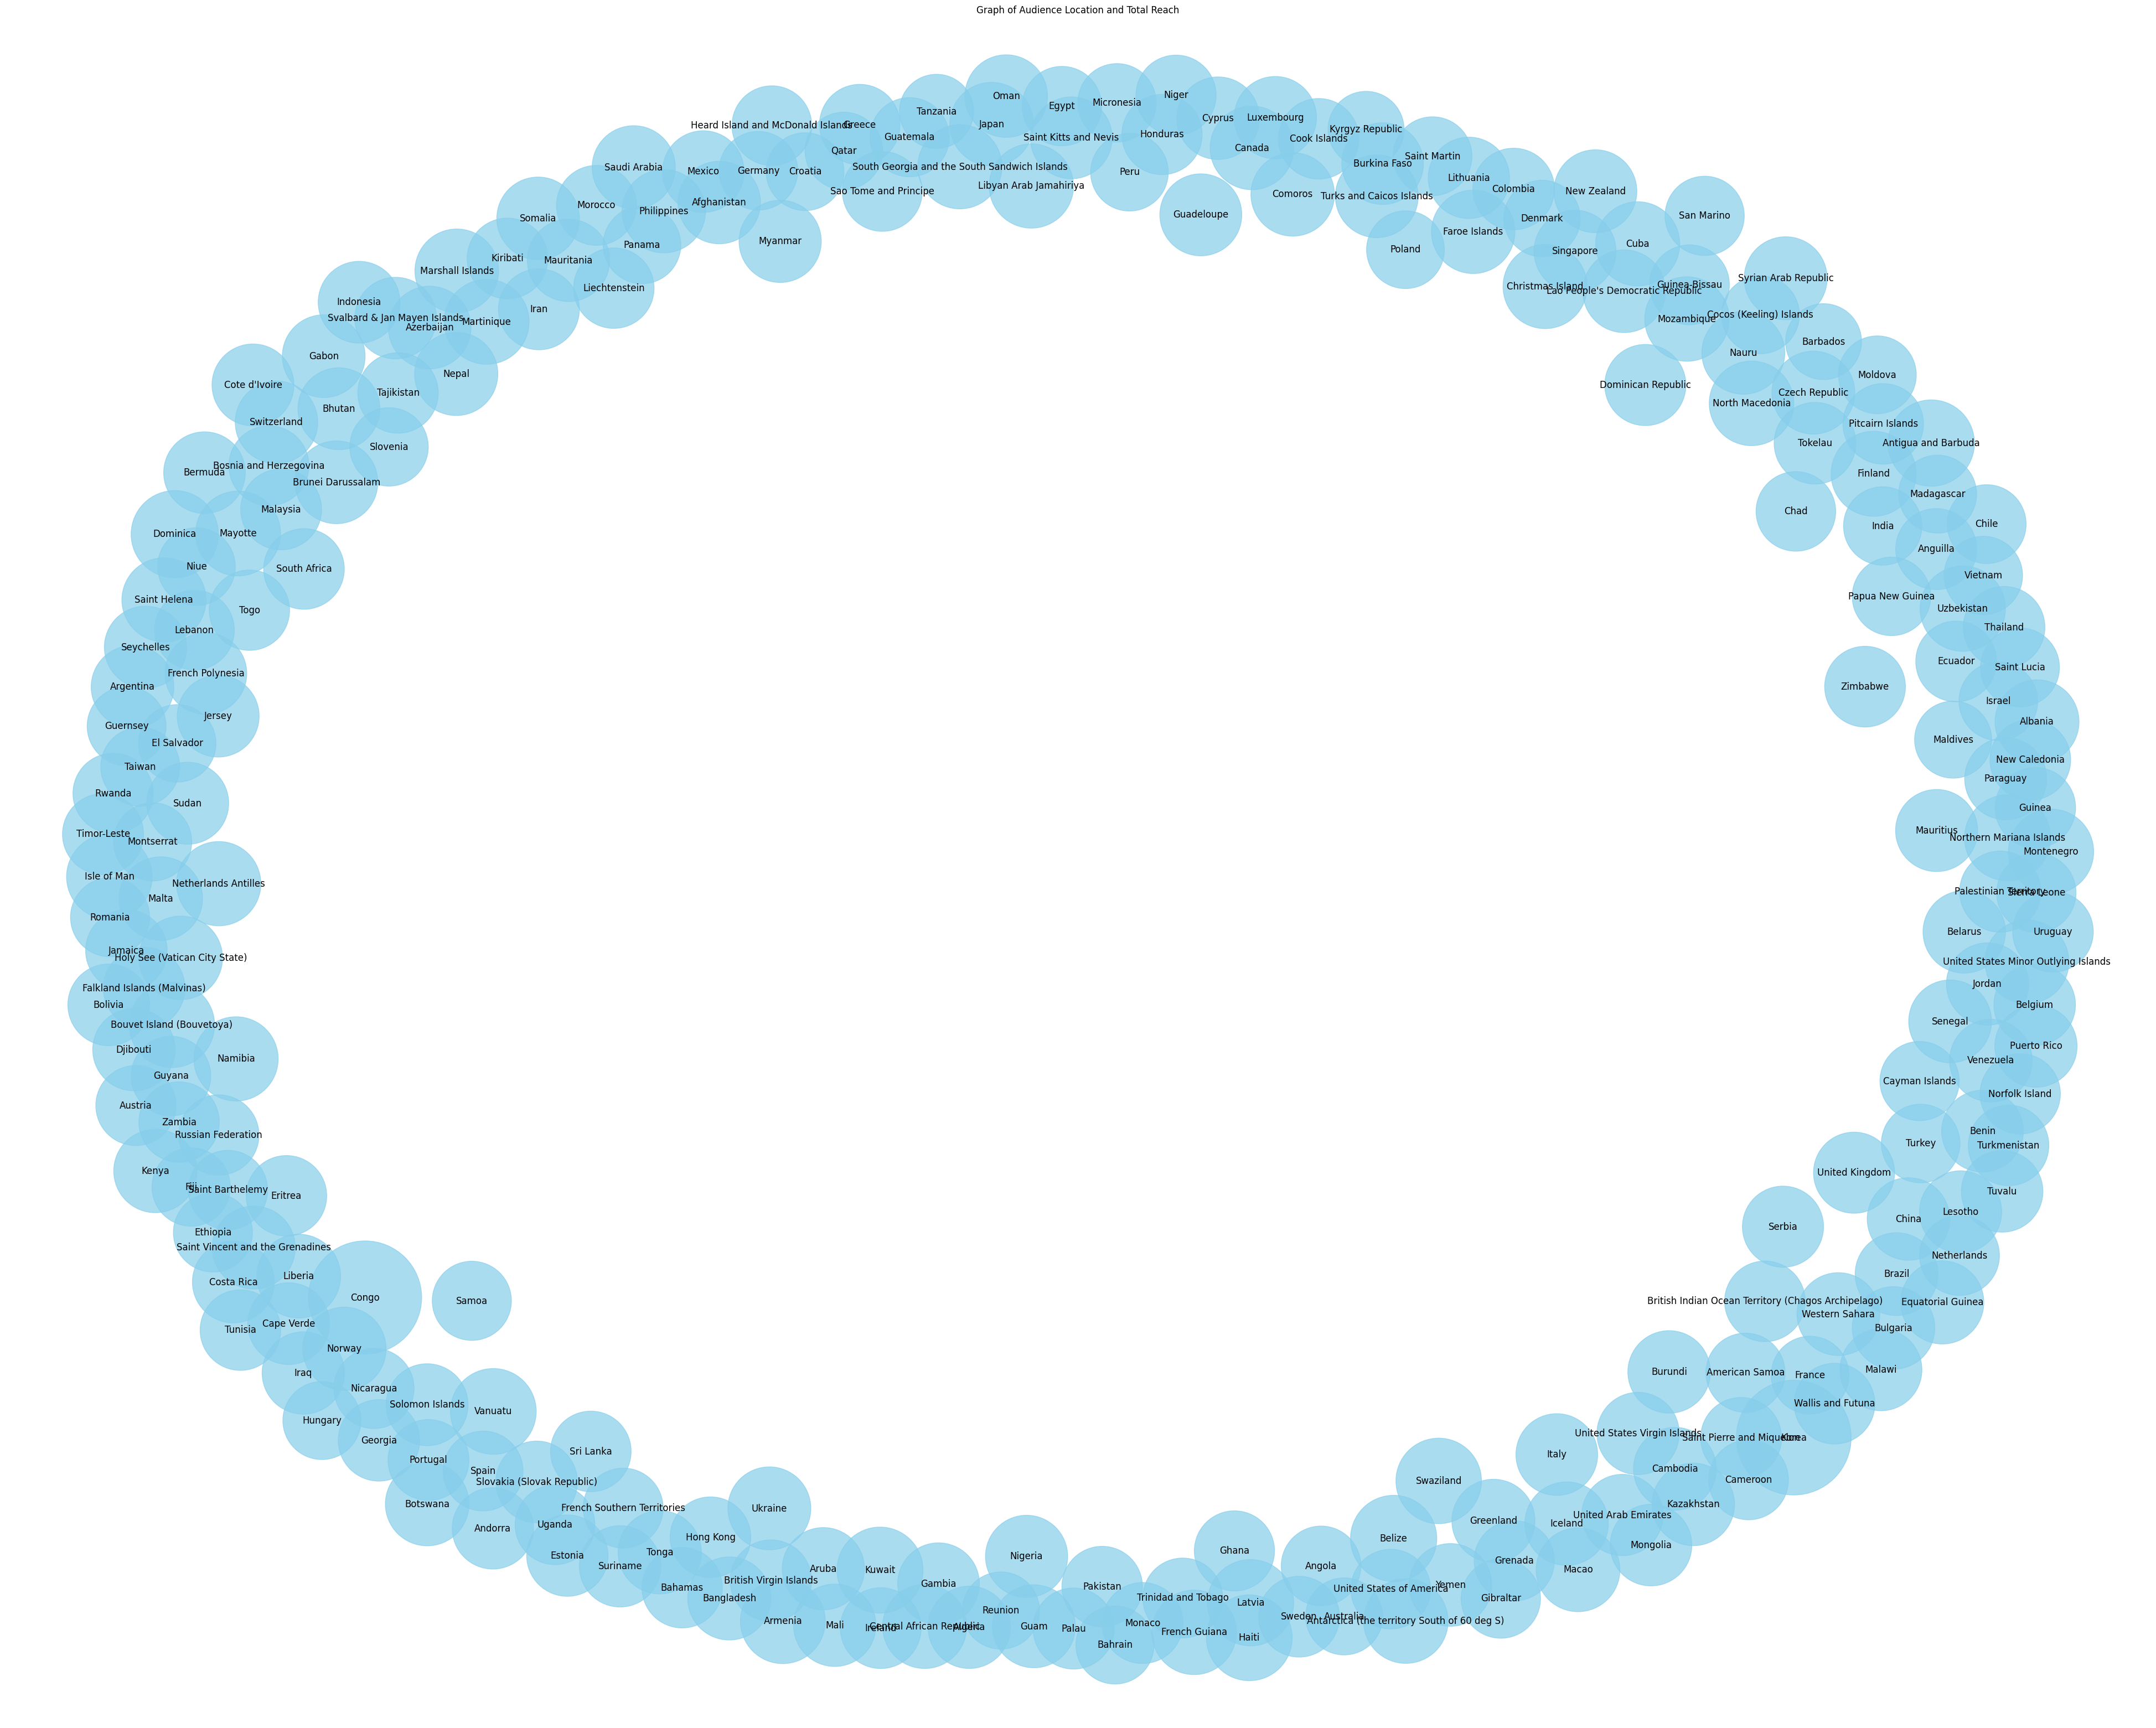

In [43]:
# Create the graph
G = nx.Graph()

# Add nodes with size attribute based on 'Reach'
for index, row in grouped.iterrows():
    # Adjust the node size by dividing by a factor to scale it visually (this factor may need adjusting)
    G.add_node(row['Audience Location'], size=row['Reach']/1000)

# Prepare sizes for visualization
sizes = [G.nodes[node]['size']*10 for node in G]  # Multiply by a factor for visual clarity

# Position nodes using one of the layout options
pos = nx.spring_layout(G)  # This layout helps spread nodes out for clarity

# Draw the network
plt.figure(figsize=(50, 40))
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color='skyblue', alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.title('Graph of Audience Location and Total Reach')
plt.axis('off')  # Hide the axes
plt.show()